# 配置Laravel环境
配置教程链接：https://www.jianshu.com/p/22ce308377ae

# 创建Laravel工程
## 1. 安装Laravel安装器：

In [ ]:
composer global require "laravel/installer"

之后就可以使用new命令建立新的laravel工程
> 但是要注意，一定将composer vender bin目录放置在系统变量$PATH中

> macOS: $HOME/.config/composer/vendor/bin

> GNU/Linux发行版：$HOME/.config/composer/vendor/bin

In [ ]:
# 修改PATH的命令
export PATH=""

## 2.通过composer创建项目:
create-project命令

In [ ]:
composer create-project laravel/laravel your-project-name --prefer-dist "5.3.*"

**启动laravel内置服务器**

In [ ]:
php artisan serve

## 3.Laravel的配置：
### 公共目录
laravel配置完成后，需要将web服务器根目录指向public目录，其中的index.php文件将作为所有进入应用程序的HTTP请求的前端控制器。
### 配置文件：
框架的配置文件在config目录下。

> 其中config/app.php中有timezone和locale经常需要更改

### 目录权限
要给storage目录以及bootstrap/cache目录读写权限，<font color=#FF0033>允许服务器写入</font>

# Laravel框架的规则
## 1. 文件夹结构
- ### a) app/Http/routes.php:
外部请求的起点函数。
- ### b) app/XXX.php
对数据对象进行操作的方法及对象
- ### c) database/migrations/XXX.php
数据migration(形成ORM)的文件

## 2. 开发要点
- ### 后端接口的开发原则及注意事项
- ### 后端路由的建立及建立原则
- ### Model的建立及其意义
- ### 后端数据的验证方式

## 3.Laravel的基础命令
### 开启/调试

In [ ]:
php -S localhost:8000 -t project-name/public

## Migration在项目中的使用
> Migration是对项目数据库的版本控制：
> php => Mysql
### 1. Mysql数据库的配置
<em>主要配置config/database.php与根目录下的.env文件</em>

https://blog.csdn.net/zjiang1994/article/details/52600135
### 2. migration命令建立表文件

In [ ]:
php artisan make:migration create_table_table1 --create=表名

这样就建成了配置数据库连接的文件

### 3.配置migration文件
- #### up()上传文件

In [ ]:
public function up()
    {
        Schema::create('table2',function(Blueprint $table)
        {
            $table->increments('id');
        });
        //
    }

Schema开头建立表名为table2的，之后是建表的函数：

要继承$table

使用table的命令进行建表，其中括号里面的字符/串就是表项名

- #### down()回退文件:php artisan migrate:rollback的操作

In [ ]:
    public function down()
    {
        Schema::drop('table2');
        //
    }

### 4.运行migrate

In [ ]:
php artisan migrate
php artisan migrate:rollback
php artisan migrate --pretend # 查看migrate语句生成的sql语句

到此，数据库部分的对象就建立完毕了

## Blueprint ’\$table’的常用方法（5.2源码)

In [ ]:
- rename($new_name):重命名表

- primary($column,$name=null):设置主键，$column是列名，$name是给主键取的名字可以为空

- unique($column,$name=null)：设置唯一元素

- index($column,$name=null)：为某列设置索引

- foreign($column,$name=null)：设置外键

- increments($column)：设置非负自增表项，一般是id类型

- char($column,$length=255)：设置char类型表项

- string($column, $length = 255)：设置string类型表项

- text($column)：设置text类型表项

- integer($column, $autoIncrement = false, $unsigned = false)：设置integer类型表项

- unsignedInteger($column, $autoIncrement = false)：无符号Integer类型表项

- float($column, $total = 8, $places = 2)：float类型

- double($column, $total = null, $places = null)：double类型

- decimal($column, $total = 8, $places = 2)：demical类型,total表示小数点左右总共的位数，places表示小数点右边的位数

- boolean($column)：bool类型

- enum($column, array $allowed)：enum类型

- dateTime($column):date-time类型
    
    $table->date('created_at');     // DATE      类型
    $table->dateTime('created_at'); // DATETIME  类型
    $table->time('sunrise');        // TIME      类型
    $table->timestamp('added_on');  // TIMESTAMP 类型
    系统辅助
    $table->timestamps();  // 添加 created_at 和 updated_at 列 
    $table->softDeletes(); // 添加 deleted_at 列用于软删除

- ipAddress($column):ip地址类型
    
- rememberToken()

## HTTP路由
> 路由的配置文件为app/Http/routes.php

基本的路由格式为:

In [ ]:
Route::<request方式>('<链接>',function()
                   {
                       //处理该request的方法
                   });

- ### 基本Request方式：
    - get
    - post
    - put
    - patch
    - delete
    - options
    - 多种request接收

In [ ]:
Route::match(['get','post'],'/',function(){
    //
});
        
Route::any('/',function(){
    //
});

- ### 路由参数

In [ ]:
Route::get('post/{post}/comments/{comment}',function ($postId,$commentId){
    //
});

若参数可有可无就在路由参数选项后面加"?"

In [ ]:
Route::get('post/{post?}/comments/{comment}',function ($postId=null,$commentId){
    //
});

- ### 命名路由
<em>通过as关键字为URL及其对应的方法进行命名</em>

1. 命名路由

In [ ]:
Route::get('user/profile',[
    'as'=>'profile',function(){
        //
    }]);

2. 为命名路由生成URL

<em>要使用命名路由之前可以使用route函数生成指定的URL</em>

In [ ]:
$url = route('profile');

若命名路由定义了参数，那么可以将参数作为route的第二个参数传递给route函数

In [ ]:
Route::get('user/{id}/profile',['as' => 'profile',function(){
    //
}]);
        
$url = route('profile', ['id' => 1]);

- ### 其它路由功能
    - 设定中间件['middleware' => 'auth]
    - 设定命名空间['namespace' => 'Admin']
    - 设定路由前缀(URL前缀)['prefix' => 'admin']

## HTTP中间件
> 中间件提供了为过滤进入应用的HTTP请求提供了一套便利的机制

> <em>所有的中间件都位于:app/Http/Middleware目录</em>

定义一个新的中间件：

In [ ]:
php artisan make:middleware OldMiddleware

之后定义一个中间件：

In [ ]:
namespace App\Http\Middleware;

use Closure;

class OldMiddleware
{
    /*
    *过滤器
    */
    public function handle($request,Closure $next)
    {
        if ($request->input('age') <= 200) {
            return redirect('home');
        }
        
        return $next($request);
    }
}

此中间件的含义是：若传来请求中的age项值小于等于200则返回url'home'。若大于则将request传入。

### 注册中间件：
- #### 全局中间件
注册的地址为:
app/Http/Kernel.php中的protected $middlewareGroups
- #### 分配中间件到路由
1. 注册key：在app/Http/Kernel.php中

In [ ]:
protected $routeMiddleware = [
    'auth' => \App\Http\Middleware\Authentication::class
];

之后便可以在route中添加要使用的middleware

In [ ]:
Route::get('admin/profile', ['middleware' => 'auth', function() {
    //
}]);

## HTTP控制器
> 请求处理逻辑处理单元,存放在app/Http/Controllers目录中

要继承App\Http\Controllers\Controller

In [ ]:
namespace App\Http\Controllers;

use App\User;
use App\Http\Controllers\Controller;

class UserController extends Controller
{
    public function showProfile($id)
    {
        return view('user.profile',['user' => User::findOrFail($id)]);
    }
}

在路由中指向该控制器动作：

In [ ]:
Route::get('user/{id}', 'UserController@showProfile');

### Restful资源控制器

In [ ]:
php artisan make:controller PhotoController --resource

这个命令生成一个控制器文件app/Http/Controllers/PhotoController.php

In [ ]:
Route::resource('photo','PhotoController');

之后就建立了restful的所有方法路由

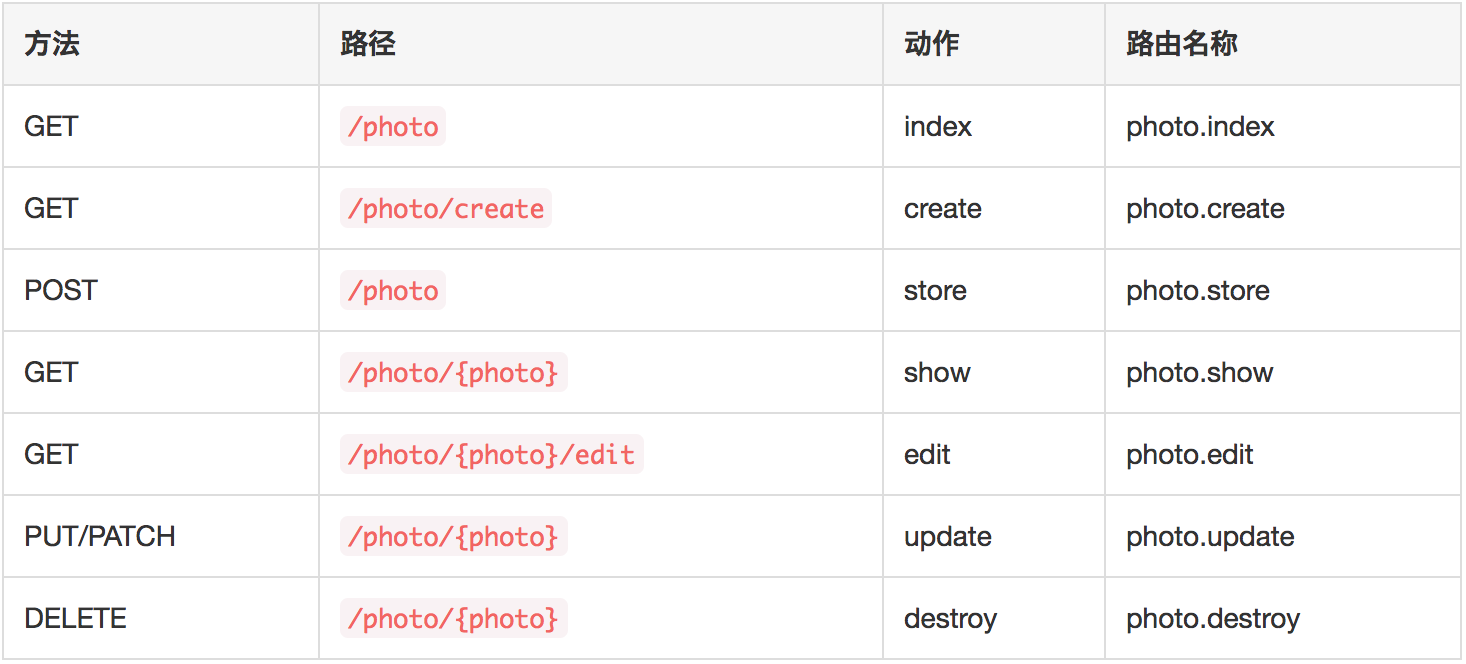
**<font color=#FF0033>要注意，此时一个Controller资源就对应一个文件，严格遵守restful规则</font>**

## Eloquent Model操作

## 建立App
命令：

In [ ]:
php artisan make:model User

这样就建立了一个关于数据对象User的一个操作对象（模型）。

> 默认来说laravel建立的model,对应于model名的复数表。如User就对应于数据库的users表

想要修改model对于表操作的配置，见官方文档。
## 对model的操作